# Compartments

Compartments are detected on the full genome matrix

In [1]:
from pytadbit.parsers.hic_parser import load_hic_data_from_reads
from cPickle import load

/home/fransua/.miniconda2/lib/python2.7/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [8]:
rep   = 'T0'

In [29]:
reso = 300000
base_path = 'results/fragment/both_{0}/03_filtering/valid_reads12_{0}.tsv'
bias_path = 'results/fragment/both_{1}/04_normalizing/biases_{0}_{1}.pick'
bads_path = 'results/fragment/both_{1}/04_normalizing/bad_columns_{0}_{1}.pick'

In [30]:
def my_load_hic_data(rep, reso):
    hic_data = load_hic_data_from_reads(base_path.format(rep), resolution=reso)
    hic_data.bias = load(open(bias_path.format(reso, rep)))
    hic_data.bads = load(open(bads_path.format(reso, rep)))
    return hic_data

In [31]:
hic_data = my_load_hic_data(rep, reso)

In [32]:
! mkdir -p results/fragment/both_$rep/05_segmenting

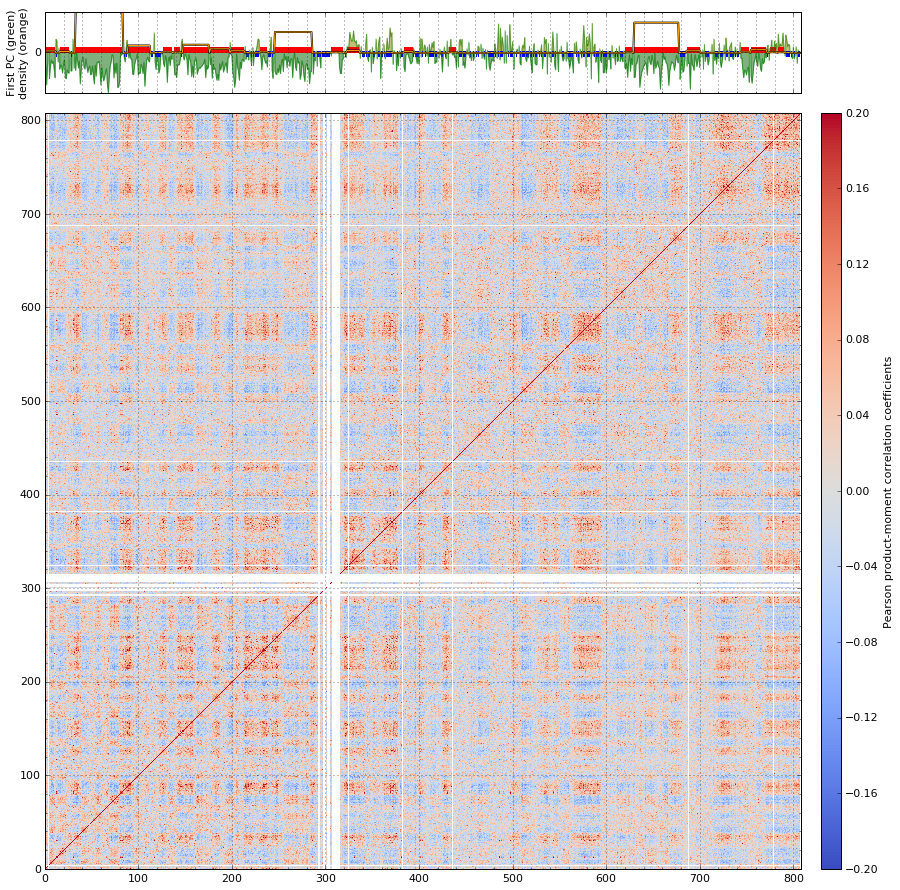

ValueError: list.remove(x): x not in list

In [33]:
crm = '2'
corr = hic_data.find_compartments(
        show=True, crms=[crm], vmin=-0.2, vmax=0.2,
        savedata='results/fragment/both_{0}/05_segmenting/compartments_{1}_{2}.tsv'.format(rep, crm, reso))

In [36]:
! head -n 20 results/fragment/both_T0/05_segmenting/compartments_2_300000.tsv

## CHR 2	Eigenvector: 1
#start	end	density	type
2	1	4	0.00	I
2	5	5	1.00	NA
2	6	291	6.52	I
2	292	293	1.00	NA
2	294	297	0.00	I
2	298	300	1.00	NA
2	301	301	0.00	I
2	302	305	1.00	NA
2	306	307	0.00	I
2	308	315	1.00	NA
2	316	324	0.01	I
2	325	325	1.00	NA
2	326	366	0.13	I
2	367	367	1.00	NA
2	368	435	0.36	I
2	436	436	1.00	NA
2	437	687	4.32	I
2	688	688	1.00	NA


# TADs

In [37]:
from pytadbit import Chromosome

In [44]:
crm = Chromosome('18')
crm.add_experiment('T0', 
                   hic_data='results/fragment/both_T0/04_normalizing/100000_raw/18.mat', 
                   norm_data='results/fragment/both_T0/04_normalizing/100000_raw/18.mat',
                   resolution=100000)
crm.add_experiment('T60', 
                   hic_data='results/fragment/both_T60/04_normalizing/100000_raw/18.mat',
                   norm_data='results/fragment/both_T0/04_normalizing/100000_raw/18.mat',
                   resolution=100000)

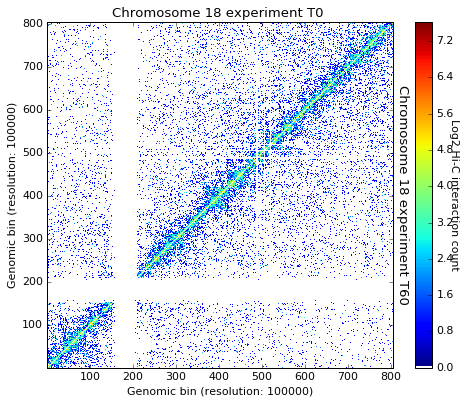

In [42]:
crm.visualize([('T0', 'T60')])

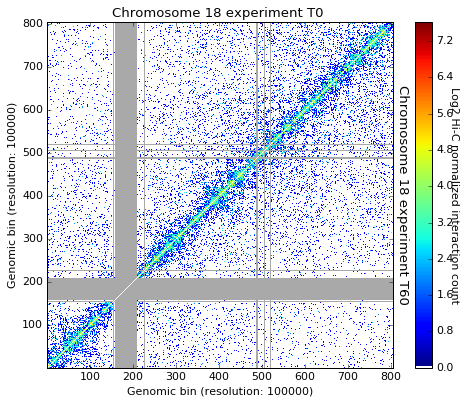

In [45]:
crm.visualize([('T0', 'T60')], normalized=True)

In [50]:
crm.find_tad(['T0', 'T60'], n_cpus=8)

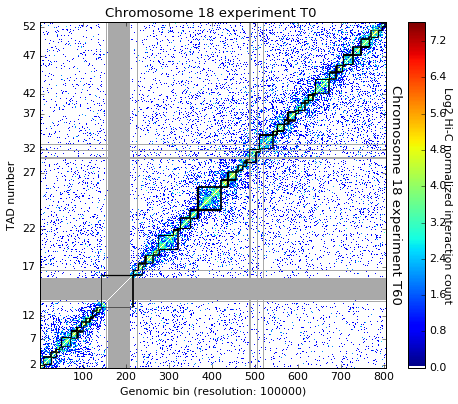

In [54]:
crm.visualize([('T0', 'T60')], normalized=True, paint_tads=True, )

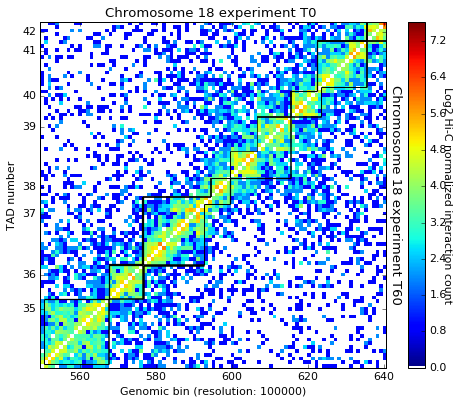

In [64]:
crm.visualize([('T0', 'T60')], normalized=True, paint_tads=True, focus=(670, 770))

In [48]:
t0 = crm.experiments['T0']
t60 = crm.experiments['T60']

In [53]:
crm.experiments

[Experiment T0 (resolution: 100 kb, TADs: 53, Hi-C rows: 804, normalized: visibility),
 Experiment T60 (resolution: 100 kb, TADs: 52, Hi-C rows: 804, normalized: visibility)]

## Save Chromosome object (with TAD definition)

In [66]:
crm.save_chromosome('results/fragment/crm18.tdb')